# Определение параметров, влияющих на успешность видеоигр

Интернет-магазин продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:** для составления плана закупки и рекламной кампании на следующий год (2017), требуется выявить параметры, которые позволят предугадать коммерческую успешность той или иной видеоигры.

**Примечание:** в наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
+ M - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
+ E - «Для всех»: Содержание подходит для возрастной категории от 6 лет.
+ T - «Подросткам»: Игра подходит для лиц от 13 лет.
+ E10+ - «Для всех от 10 лет и старше».
+ RP - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
+ EC - «Для детей младшего возраста»: Игра подходит для детей от 3 лет.

**Описание данных:**

+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# 1. Изучение данных

Изучим данные, для этого прочитаем файл и выведем общую информацию о нем. Также импортируем все библиотеки, которые мы будем использовать в исследовании.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
import random
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('../input/video-games-dataset/games_dataset.csv')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Количество строк в разных столбцах различается, значит имеются пропуски данных. Кроме того, в ряде столбцов тип данных не соответствует их характеру, а именно год релиза записан при помощи чисел с плавающей точкой, а пользовательский рейтинг - в виде текста. Также целесообразно привести все названия столбцов к нижнему регистру.

Выясним, за какой период собраны данные.

In [2]:
period = df['Year_of_Release'].max() - df['Year_of_Release'].min() 
print('Данные собирались с {} по {} годы, итого {} лет.'.
      format(int(df['Year_of_Release'].min()), int(df['Year_of_Release'].max()), int(period)))

Данные собирались с 1980 по 2016 годы, итого 36 лет.


### Вывод
Данные представляют собой таблицу, каждая строка которой обозначает видеоигру, а каждому столбцу соответствует определенный параметр этой видеоигры. Всего собраны данные о 16715 видеоиграх; данные охватывают промежуток в 36 лет, с 1980 по 2016 годы, т.е. фактически весь период существования видеоигр до 2016 года. Необходимо решить следующие проблемы:

+ привести названия столбцов к одному регистру;
+ для некоторых столбцов изменить тип данных;
+ изучить характер пропусков и при необходимости обработать их.

# 2. Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [3]:
df.columns = df.columns.str.lower()

Изменим типы данных. Год выпуска сделаем целым числом, а пользовательский рейтинг - дробными числом; сейчас он записан как текст и это будет препятствовать анализу.

In [4]:
print(df['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
1.5       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Как мы помним, в обоих этих столбцах есть пропуски, кроме того, в рейтинге пользователей достаточно часто встречается значение 'tbd' - **To Be Determined**, что означает, что на данный момент данные отсутствуют. Заменим 'tbd' на NaN и приведем данные к нужным типам.

In [5]:
df.loc[df['user_score'] =='tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('Int64') # Используем Int64 чтобы изменить тип несмотря на пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Выясним, есть ли значения 'tbd' в столбце 'rating', т.к. он тоже содержит текстовые данные; при необходимости заменим 'tbd' на NaN.

In [6]:
print(df.loc[df['rating'] =='tbd', 'rating'].count())

0


**Пропуски** содержатся в столбцах с **описанием** видеоигры, таких как название, год выпуска, жанр, и в столбцах с **рейтингами**.

+ Пропуски в столбцах с рейтингами многочисленны и составляют бóльшую часть всех значений рейтингов, они могут быть связаны с отсутствием данных. При таком условии будет некорректно заполнять их медианными значениями, даже разбив на категории. Удалять такой большой массив данных мы не можем.
+ Пропуски в столбцах c описанием относительно немногочисленны и могут быть связаны с ошибками при сборе даных. Пропуски в названиях и жанре мы не можем корректно заполнить. Удалить мы их тоже не можем, так как пропадут нужные для исследования данные. На этом этапе сохраним пропуски в этих столбцах.
+ Обработать некоторые пропуски в столбце с годом выпуска представляется возможным. Как правило игра выходит на разных платформах с небольшим временным интервалом. Используем медиану годов выпуска каждой игры на всех платформах, чтобы заполнить часть пропусков.

In [7]:
# Группируем данные по именам и платформам, заменяем пропуски на медианы в столбце 'year_of_release'
df['year_of_release'] = df['year_of_release'].fillna(df.groupby(['name', 'platform'])['year_of_release'].transform('median'))

Проверим данные на дубликаты.

In [8]:
df.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах, добавим соответствующий столбец.

In [9]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['not_jp_sales'] = df['total_sales'] - df['jp_sales'] # Потребуется в исследовании

### Вывод
В рамках предобработки данных мы привели названия столбцов к одному регистру, изменили тип данных там, где это было необходимо. Изучив характер пропусков, мы решили их не обрабатывать, но изменили значения 'tbd' на NaN для пользовательского рейтинга. Кроме того, мы проверили данные на дубликаты, и вычислили суммарные продажи во всех регионах, добавив при этом соответствующий столбец.

# 3. Исследовательский анализ данных

Выясним, сколько игр выпускалось за разные годы.

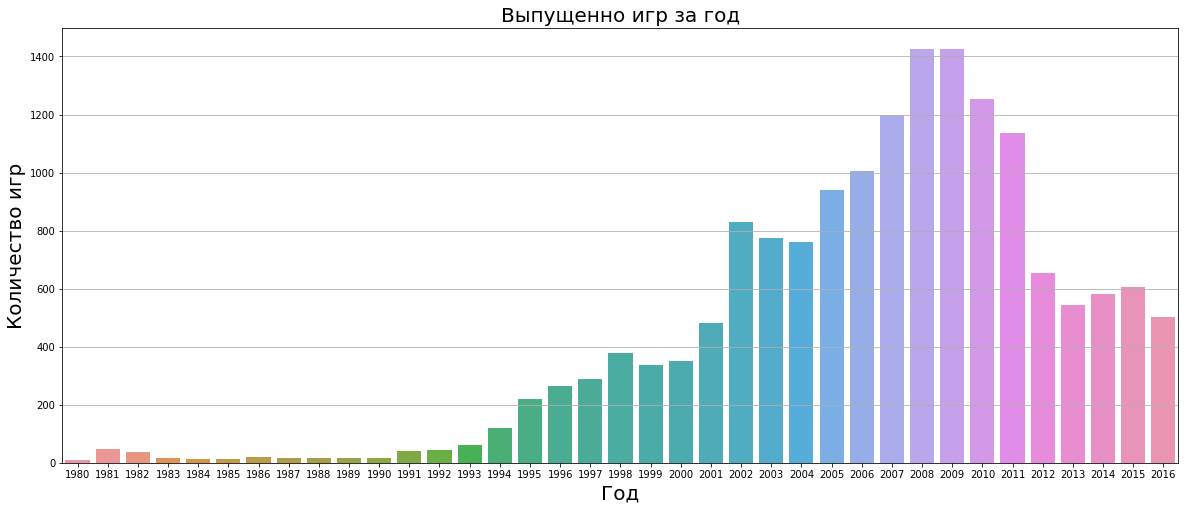

In [10]:
grouped_by_year = df.pivot_table(index='year_of_release', values='platform', aggfunc='count') # Создаем таблицу с группировкой данных по годам

plt.figure(figsize=[20,8]) # Строим гистограмму
ax=sns.barplot(data=grouped_by_year, x=grouped_by_year.index, y="platform")
ax.axes.set_title('Выпущенно игр за год',fontsize=20)
ax.set_xlabel('Год',fontsize=20)
ax.set_ylabel('Количество игр',fontsize=20)
ax.tick_params(labelsize=10)
ax.yaxis.grid(True)

Как видим, в исследовании целесообразно использовать данные начиная **с 1994 года**.

**Популярные платформы**

Выясним, на каких платформах было продано больше всего игр.

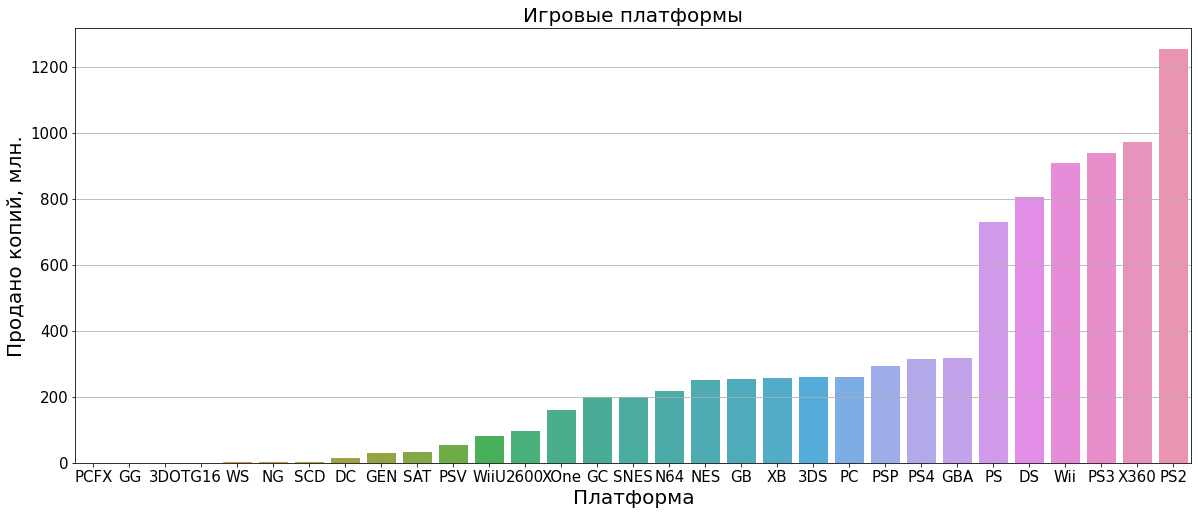

In [11]:
# Группируем данные по платформам, суммируем продажи
grouped_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales')

plt.figure(figsize=[20,8]) # Строим гистограмму
ax=sns.barplot(data=grouped_by_platform, x=grouped_by_platform.index, y="total_sales")
ax.axes.set_title('Игровые платформы',fontsize=20)
ax.set_xlabel('Платформа',fontsize=20)
ax.set_ylabel('Продано копий, млн.',fontsize=20)
ax.tick_params(labelsize=15)
ax.yaxis.grid(True)

Выделим 6 самых популярных игровых платформ:
1. PS2
2. X360
3. PS3
4. Wii
5. DS
6. PS

Выясним, как менялись продажи по платформам с течением времени. 

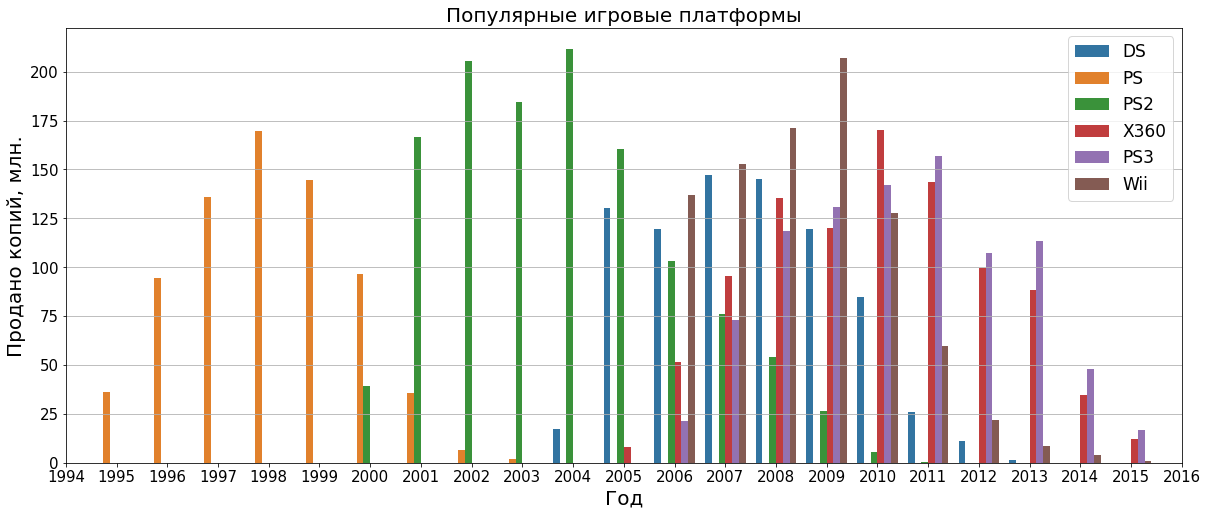

In [12]:
# Группируем данные по годам и платформам и считаем суммарные продажи, затем выбираем самые популярные платформы.
platform_by_years = df.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum')
platform_by_years.reset_index(inplace=True)
top_platforms = platform_by_years[platform_by_years['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
# Строим график
plt.figure(figsize=[20,8])
ax=sns.barplot(data=top_platforms, x='year_of_release', y='total_sales', hue='platform')
ax.axes.set_title('Популярные игровые платформы',fontsize=20)
ax.set_xlabel('Год',fontsize=20)
ax.set_ylabel('Продано копий, млн.',fontsize=20)
ax.set(xlim=(1, 23))
ax.tick_params(labelsize=15)
ax.yaxis.grid(True)
plt.legend(loc='upper right', prop={'size': 17})
plt.show()

**Актуальный период**

Как видим, у каждой игровой платформы есть **срок жизни**, который составляет в среднем около **10 лет**, причем, как правило, первую половину этого периода продажи растут, а вторую половину - падают. Также отметим, что на 2016 год самые успешные платформы практически полностью потеряли свою актуальность. Проверим, правильно ли мы визуально определили среднее время жизни популярных платформ.

In [13]:
def period(years): # Напишем функцию, которая считает период
    result = years.max()-years.min()
    return result
# Сгруппируем данные по годам, посчитаем срок жизни каждой платформы и найдем медиану этих значений    
platforms_lifetime = top_platforms.pivot_table(index='platform', values='year_of_release', aggfunc=period)
platforms_lifetime.median()

year_of_release    10.5
dtype: float64

Будем считать 10 лет средним сроком жизни успешной платформы. Так как первую половину этого периода продажи платформы растут, а вторую половину - падают, то для поиска перспективных платформ целесообразно рассматривать период **5 лет**. Будем считать это **актуальным периодом**, на основании данных которого можно строить проноз. В  дальнейшем исследовании будем рассматривать период **с 2011 по 2016** годы, так как данные за 2016 год могут быть неполными.

**Перспективные платформы**

Мы выяснили, что на 2016 год топ-6 успешных платформ практически перестали продаваться. Рассмотрим актуальный период и попытаемся найти перспективные платформы.

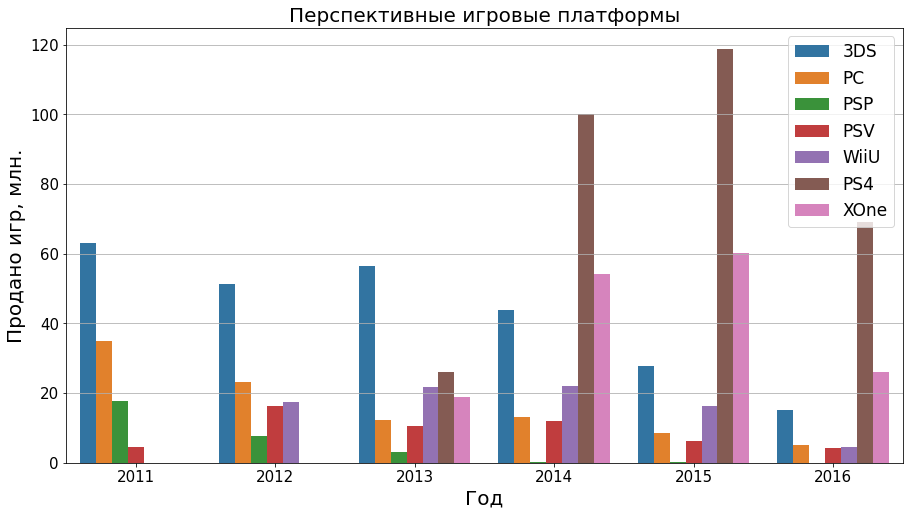

In [14]:
actual_df=df.loc[df['year_of_release'] >= 2011] # Общий датафрейм с актуальным периодом, потребуется в исследовании
# Ограничиваем год выпуска и исключаем уже рассмотренные платформы
platform_by_years = platform_by_years.loc[platform_by_years['year_of_release'] >= 2011]
promising_platforms = platform_by_years.loc[~platform_by_years['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
# Строим график
plt.figure(figsize=[15,8])
ax=sns.barplot(data=promising_platforms, x='year_of_release', y='total_sales', hue='platform')
ax.axes.set_title('Перспективные игровые платформы',fontsize=20)
ax.set_xlabel('Год',fontsize=20)
ax.set_ylabel('Продано игр, млн.',fontsize=20)
ax.set(xlim=(-0.5, 5.5))
ax.tick_params(labelsize=15)
ax.yaxis.grid(True)
plt.legend(loc='upper right', prop={'size': 17})
plt.show()

Как видим, имеется две перспективные ировые платформы. **PS4 и XOne** выходят на рынок в 2013 году и непрерывно наращивают продажи (данные за 2016 год моут быть неполными). Если учесть, что средний срок жизни популярной платформы составляет около 10 лет, то в 2017 году PS4 и XOne как раз могут выйти на пик популярности. Хотя продажи **3DS** снижаются, они все же сохраняются на относительно высоком уровне, будем считать эту платформу актуальной.

Построим диаграммы размаха для продаж всех игровых платформ за актуальный период. <a id='boxplot'></a>

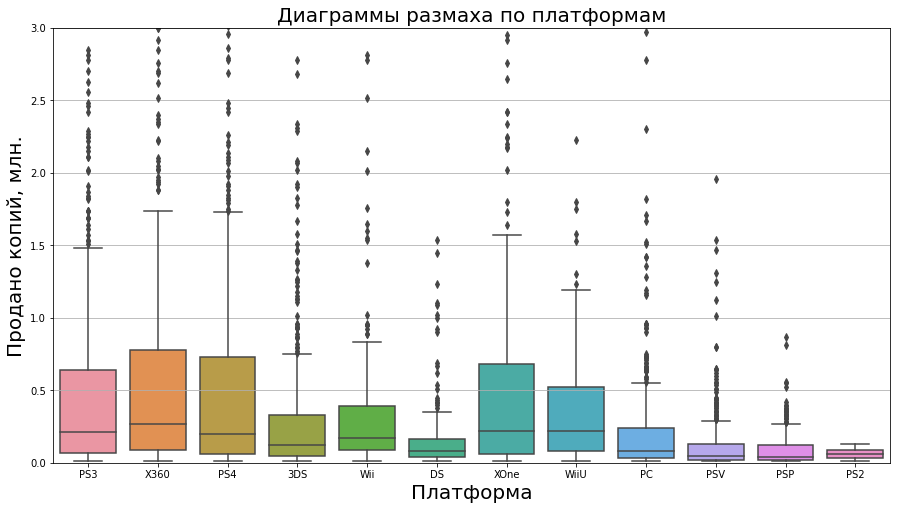

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x='platform', y='total_sales', data=actual_df)
plt.title('Диаграммы размаха по платформам', fontsize=20)
plt.xlabel('Платформа',fontsize=20)
plt.ylabel('Продано копий, млн.',fontsize=20)
plt.grid(axis='y')
plt.ylim(0,3)
plt.show()

Практически для всех платформ данные распределены несимметрично. Также наблюдаем большое количество выбросов. Это говорит о наличии бестселлеров - игр, которые продаются гораздо более массово других. Для платформ с особенно большим количеством выбросов, например 3DS, можно предположить, что значительная часть продаж осуществляется именно за счет бестселлеров. В то же время длинный "ящик" и "ус" в сочетании с относительно малым количеством выбросов, например у XOne, говорит нам о том, что пользователи покупают самые разные игры на этой платформе.

Рассмотрим лидеров по суммарным продажам.

In [16]:
platform_by_years.pivot_table(index='platform', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,84.625
PS3,77.560
X360,61.660
3DS,47.560
XOne,40.110
WiiU,17.560
PC,12.830
DS,11.010
PSV,8.420


За актуальный период лидерами по продажам являются PS3, X360, PS4, 3DS и XOne. Как выясняется, лидерство по продажам за период еще не означает перспективность платформы.

**Влияние отзывов на продажи** <a id='scores'></a>

Как мы помним, в актуальный период одними из лидеров по продажам были платформы PS3 и PS4, причем в рассмотренный период продажи PS4 росли, а PS3 - падали. Выясним, как влияли отзывы критиков и пользователей на продажи этих платформ. Для этого построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

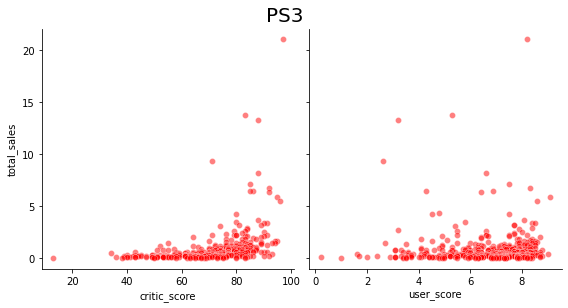

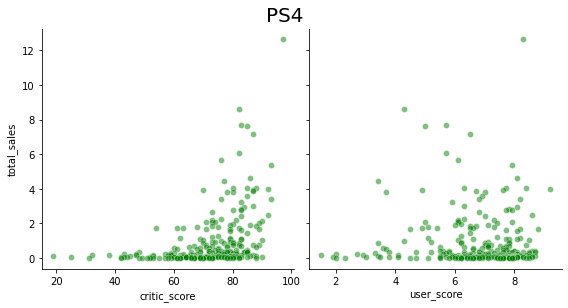

In [17]:
ps3_ratings = actual_df.loc[actual_df['platform'] == 'PS3'] # Создаем датафреймы с платформами
ps4_ratings = actual_df.loc[actual_df['platform'] == 'PS4']
# Строим графики
ax=sns.pairplot(
    ps3_ratings,
    x_vars=['critic_score', 'user_score'],
    y_vars=['total_sales'],
    height=4,
    plot_kws={'alpha':0.5, 'color':'r'},
    )
ax.fig.suptitle("PS3", y=1.05, fontsize=20)
plt.show()

ax=sns.pairplot(
    ps4_ratings,
    x_vars=['critic_score', 'user_score'],
    y_vars=['total_sales'],
    height=4,
    plot_kws={'alpha':0.5, 'color':'g'},
    )
ax.fig.suptitle("PS4", y=1.05, fontsize=20)
plt.show()

Посчитаем и визуализируем корреляцию с помощью тепловой карты.

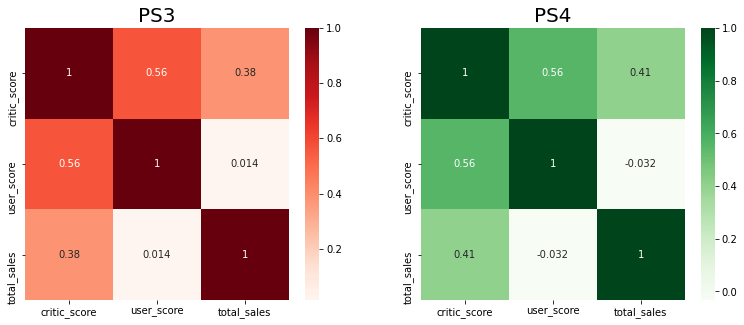

In [18]:
heatmap_data_ps3=ps3_ratings[['critic_score', 'user_score', 'total_sales']] # Подготовим датафреймы для тепловых карт
heatmap_data_ps4=ps4_ratings[['critic_score', 'user_score', 'total_sales']]
# Строим тепловые карты
fig = plt.figure(figsize=(13,5))
fig.subplots_adjust(wspace=0.2)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.heatmap(heatmap_data_ps3.corr(), ax=ax1, cmap='Reds', annot=True)
sns.heatmap(heatmap_data_ps4.corr(), ax=ax2, cmap='Greens', annot=True)
ax1.set_title('PS3', fontsize=20)
ax2.set_title('PS4', fontsize=20)
plt.show()

Как видим, в обоих случаях продажи прямо коррелируют с отзывами критиков, а вот между продажами и отзывами пользователей связи практически нет.

Посчитаем и визуализируем корреляцию для других популярных в актуальный период платформ: 

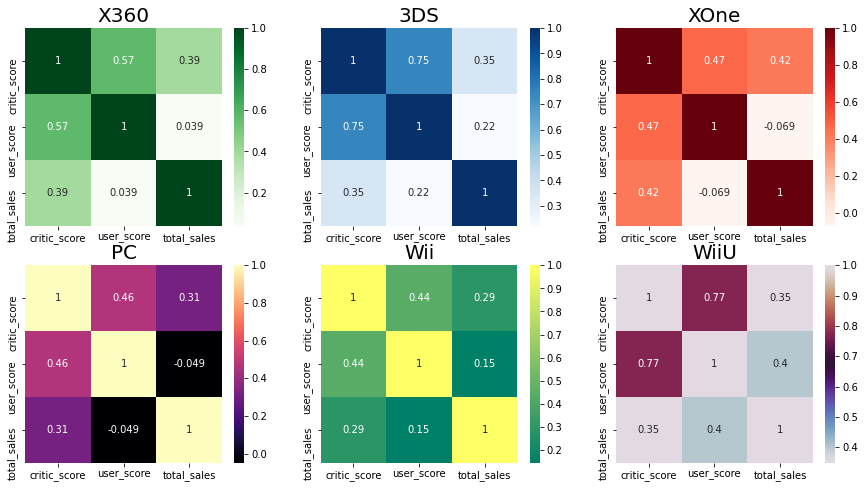

In [19]:
platforms=['X360', '3DS', 'XOne', 'PC', 'Wii', 'WiiU'] # Укажем несколько других популярных платформ за период
heat_colors=['Greens', 'Blues', 'Reds', 'magma', 'summer', 'twilight'] # Пусть тепловые карты будут разных цветов
n=0 # Счетчик порядкового номера положения графика и цвета в heat_colors

fig = plt.figure(figsize=(15,8))
for platform in platforms:
    temp_df=actual_df.loc[actual_df['platform'] == platform]
    heatmap_temp = temp_df[['critic_score', 'user_score', 'total_sales']]
    plt.subplot(2, 3, n+1)
    sns.heatmap(heatmap_temp.corr(), cmap=heat_colors[n], annot=True)
    plt.title(platform, fontsize=20)
    n+=1
plt.show()

Как видим, на других платформах ситуация с отзывами критиков такая же - есть корреляция с объемом продаж. А вот с отзывами пользователей все не так однозначно, например для WiiU, Wii и 3DS зависимость между отзывами и продажами есть, правда нельзя сказать наверняка, отзывы повлияли на продажи, или наоборот. 

**Популярные жанры**

Выясним, какие бывают жанры, насколько они массовы и как хорошо продаются.

In [20]:
actual_df['genre'].value_counts() # Посчитаем, сколько игр разных жанров было выпущено

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

In [21]:
# Посчитаем, сколько заработал каждый жанр
genres_sales=actual_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genres_sales

,total_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


Как видим, массовый жанр не значит продающийся. Например, третий по массовости жанр Adventure, по продажам тоже третий, но уже с конца. В целом же можно сказать, что самые продающиеся жанры - **Action, Shooter и Role-Playing**; меньше продавались Adventure, Strategy и Puzzle.

Визуализируем продажи по жанрам.

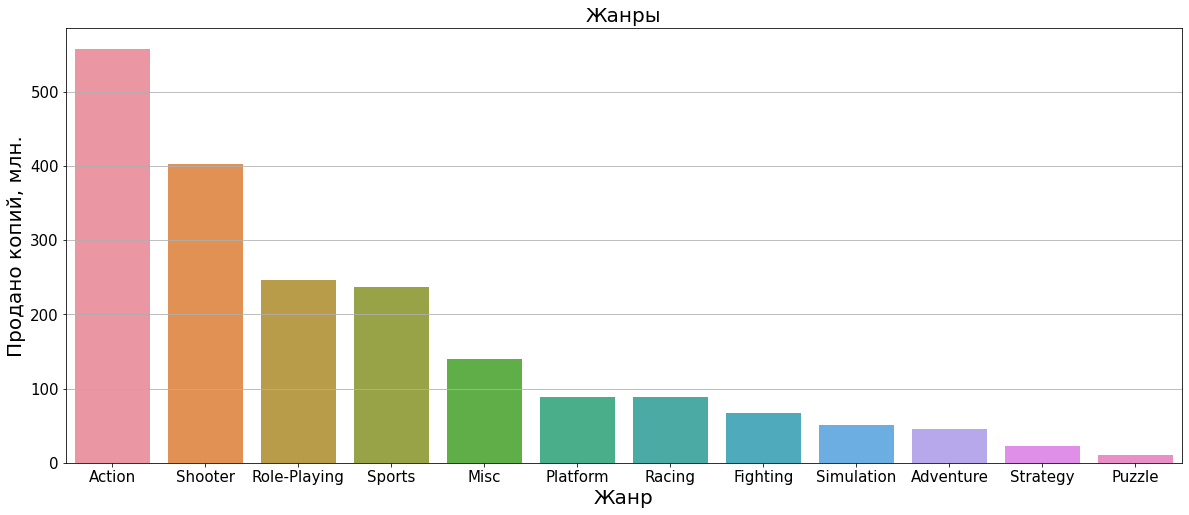

In [22]:
plt.figure(figsize=[20,8])
ax=sns.barplot(data=genres_sales, x=genres_sales.index, y='total_sales')
ax.axes.set_title('Жанры',fontsize=20)
ax.set_xlabel('Жанр',fontsize=20)
ax.set_ylabel('Продано копий, млн.',fontsize=20)
ax.tick_params(labelsize=15)
ax.yaxis.grid(True)

Как мы помним по [диаграммам размаха](#boxplot), существет большое количество игр-бестселлеров, продажи которых могут в десятки раз отличаться от средних значений, таким образом полученные результаты не всегда можно использовать при прогнозе, ведь не всегда есть возможность заранее выявить бестселлеры. Выясним, насколько сильно влияние бестселлеров на данные по жанрам и какие жанры **в среднем** более продаваемы. 

In [23]:
genres_sales_mean=actual_df.pivot_table(index='genre', values='total_sales', aggfunc=['mean','median','std']).sort_values(by=('mean','total_sales'), ascending=False)
genres_sales_mean

,mean,median,std
,total_sales,total_sales,total_sales
genre,,,
Shooter,1.224650,0.410,2.269889
Platform,0.726885,0.185,1.513836
Sports,0.609640,0.200,1.075213
Role-Playing,0.528237,0.150,1.300689
Racing,0.490611,0.160,1.212137
Action,0.439559,0.130,1.122831
Fighting,0.420755,0.180,0.814960
Misc,0.371787,0.130,0.959781


Видим, что средние значения сильно отличаются от медиан в бóльшую сторону, среднеквадратичные отклонения имеют большие значения, это говорит нам о наличии бестселлеров для всех жанров. Визуализируем полученные данные.

In [24]:
fig = go.Figure(data=[
    go.Bar(name='Среднее', x=genres_sales_mean.index, y=genres_sales_mean[('mean','total_sales')]),
    go.Bar(name='Медиана', x=genres_sales_mean.index, y=genres_sales_mean[('median','total_sales')])],
               )
fig.update_layout(
    barmode='group',
    title={'text':'Средние и медианные продажи', 'x':0.5, 'y':0.87},
    xaxis_title='Жанр',
    yaxis_title='Продано копий, млн.'
)
fig.show()

Действительно, если оценивать средние/медианные значения, результат кардинально отличается, **в среднем** самые продаваемые жанры: **Shooter, Platform и Sports**. Таким образом, если мы не можем позволить себе закупить все новинки конкретного жанра, есть смысл ориентироваться на медианные значения, чтобы минимизировать риск непопадания бестселлеров в наш ассортимент.

### Вывод
В рамках исследовательского анализа данных мы выяснили:
+ Игровая индустрия начала активно развиваться **с 1994 года** - до этого объем выпущенных игр не превышал ста копий в год.
+ Самые **популярные** игровые платформы до 2017 года - **PS2, X360, PS3, Wii, DS и PS**.
+ Средний **срок жизни** популярной игровой платформы - **10 лет**, с ростом в первые 5 лет и спадом в последующие. Исходя из этого, для поиска перспективных платформ целесообразно рассматривать **пятилетний актуальный период**.
+ На 2016 год самые **перспективные** ировые платформы - **PS4 и XOne**; в **2017** году они могут выйти на **пик продаж**; платформа **3DS** продолжает оставаться актуальной.
+ Для большинства платформ характерен плавный рост продаж а затем плавный спад.
+ Для каждой платформы существует большое количество **игр-бестселлеров**, их продажи могут превышать средние значения в десятки раз. Для определения перспективных категорий игр целесообразно оценивать **медианные значения** продаж. 
+ Существует прямая зависимость между **отзывами критиков** и объемом продаж. Связь между объемом продаж и отзывами пользователей зависит от игровой платформы, где-то она совсем отсутствует,  а где-то даже сильнее зависимости от отзывов критиков, например на WiiU.
+ Самые продаваемые жанры игр - **Action, Shooter и Role-Playing**, данные результаты получены за счет массовости жанров и большого количества бестселлеров. Самые продаваемы жанры **в среднем** - **Shooter, Platform и Sports**.

# 4. Портрет пользователя для каждого региона

**Популярные платформы в разных регионах**

Выясним, какие платформы популярны в разных регионах, выделим топ-5 для каждого.

In [25]:
# Группируем даные по платформам, находим медианы продаж для каждого региона, сортируем по продажам в США
sales=actual_df.pivot_table(
    index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
# Строим график
fig = go.Figure(data=[
    go.Bar(name='США', x=sales.index, y=sales['na_sales']),
    go.Bar(name='Европа', x=sales.index, y=sales['eu_sales']),
    go.Bar(name='Япония', x=sales.index, y=sales['jp_sales'])],
               )
fig.update_layout(
    barmode='group',
    title={'text':'Платформы по регионам', 'x':0.5, 'y':0.87},
    xaxis_title='Платформа',
    yaxis_title='Продано копий, млн.'
)
fig.show()

Как видим, картина для разных регионов отличается, и если США и Европа в чем-то схожи по предпочтениям, и разница в продажах между самыми популярными платформами не так драматична, то в Японии есть своя любимая платформа 3DS, которая лидирует с двукратным отрывом от ближайшего конкурента. Кроме того, можно сказать, что в Японии любят мобильные игровые платформы. В целом же США лидируют по объему рынка, на втором месте Европа, на третьем - Япония.
+ Лидеры продаж в США: X360, PS3, PS4, XOne, 3DS
+ Лидеры продаж в Европе: PS3, PS4, X360, 3DS, PC
+ Лидеры продаж в Японии: 3DS, PS3, PSP, PSV, PS4

**Популярные жанры в разных регионах**

Выясним, какие жанры популярны в разных регионах, выделим топ-5 для каждого.

In [26]:
# Группируем даные по жанрам, суммируем продажи для каждого региона, сортируем по продажам в США
genres=actual_df.pivot_table(
    index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
# Строим график
fig = go.Figure(data=[
    go.Bar(name='США', x=genres.index, y=genres['na_sales']),
    go.Bar(name='Европа', x=genres.index, y=genres['eu_sales']),
    go.Bar(name='Япония', x=genres.index, y=genres['jp_sales'])],
               )
fig.update_layout(
    barmode='group',
    title={'text':'Жанры по регионам', 'x':0.5, 'y':0.87},
    xaxis_title='Жанр',
    yaxis_title='Продано копий, млн.'
)
fig.show()

In [27]:
# Найдем долю рынка двух лидирующих жанров в Японии
top_genres_ratio_jp = (genres.loc['Role-Playing', 'jp_sales']+genres.loc['Action', 'jp_sales']) / genres['jp_sales'].sum()
print('Жанры Role-Playing и Action составляют {:.2%} всего рынка игр в Японии.'.format(top_genres_ratio_jp)) 

Жанры Role-Playing и Action составляют 58.41% всего рынка игр в Японии.


Наблюдаем похожую ситуацию, но в данном случае топ-5 жанров для США и Европы полностью совпадает. Разница в продажах между жанрами для этих стран так же небольшая. В Японии же предпочтения сильно отличаются, и снова есть лидеры с большим отрывом: Role-Playing и Action, эти жанры составляют почти 60% рынка игр этой страны.

+ Лидеры продаж в США: Action, Shooter, Sports, Role-Playing, Misc(Смешанный)
+ Лидеры продаж в Европе: Action, Shooter, Sports, Role-Playing, Misc(Смешанный)
+ Лидеры продаж в Японии: Role-Playing, Action, Misc(Смешанный), Fighting, Platform

**Влияние возрастного рейтинга на продажи в регионах**

Выясним, какие бывают рейтинги, какие из них самые массовые, и как они влияют на продажи в каждом регионе.

In [28]:
print(actual_df['rating'].value_counts()) # Оценим количество игр по рейтингам и посчитаем долю пропусков за актуальный период
rating_na_ratio = actual_df['rating'].isna().count()/(actual_df['rating'].isna().count()+actual_df['rating'].count())
print()
print('Возрастной рейтинг не указан для {:.2%} игр.'.format(rating_na_ratio))

M       622
E       618
T       616
E10+    456
RP        1
EC        1
Name: rating, dtype: int64

Возрастной рейтинг не указан для 63.48% игр.


Основные возрастные категории примерно равны по объему, исключения: E10(10+) - таких игр немного меньше и EC(3+) - за актуальный период была выпущена только одна такая игра. Для бóльшей же части игр - **63%**, данные по возрастному рейтингу отсутствуют.

**Entertainment Software Rating Board** (ESRB) — негосударственная саморегулирующаяся организация, которая присваивает рейтинги компьютерным и видеоиграм, а также другому развлекательному программному обеспечению в **США и Канаде**. Получение рейтинга добровольно, однако необходимо для успешных продаж на территории **США и Канады**.

Выясним, насколько этот рейтинг распространен в **Японии**. Для этого найдем, какая доля игр была продана на японском рынке без указания возрастного рейтинга ESRB.

In [29]:
rating_na_ratio_jp = actual_df[actual_df['rating'].isna()]['jp_sales'].sum()/actual_df['jp_sales'].sum()
print('В Японии {:.2%} игр были проданы без указания возрастного рейтинга ESRB.'.format(rating_na_ratio_jp))

В Японии 56.26% игр были проданы без указания возрастного рейтинга ESRB.


Как видим, ESRB не очень распространен в Японии, бóльшая часть игр там продается без указания данного возрастного рейтинга.

In [30]:
# Группируем даные по возрастному рейтингу, суммируем продажи для каждого региона, сортируем по продажам в США
rating=actual_df.pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
# Строим график
fig = go.Figure(data=[
    go.Bar(name='США', x=rating.index, y=rating['na_sales']),
    go.Bar(name='Европа', x=rating.index, y=rating['eu_sales']),
    go.Bar(name='Япония', x=rating.index, y=rating['jp_sales'])],
               )
fig.update_layout(
    barmode='group',
    title={'text':'Возрастной рейтинг по регионам', 'x':0.5, 'y':0.87},
    xaxis_title='Рейтинг',
    yaxis_title='Продано копий'
)
fig.show()

Картина для Японии снова отличается, и снова есть большой отрыв, хотя его и не видно на графике. Напомним, что бóльшая часть игр (56%) в Японии продается без указания возрастного рейтинга ESRB.
+ Лидеры продаж в США: M(17+), E(6+), E10(10+), T(13+)
+ Лидеры продаж в Европе: M(17+), E(6+), T(13+), E10(10+) 
+ Лидеры продаж в Японии: Без рейтинга, E(6+), T(13+), M(17+), E10(10+)

Мы видим, что параметры популярных игр в Японии кардинально отличаются от США и Европы. Как мы выяснили [в предыдущей главе](#scores), существует зависимость продаж от отзывов критиков, а связь между отзывами пользователей и продажами зависит от платформы. Теперь сравним эти закономерности для японского рынка и остального мира.

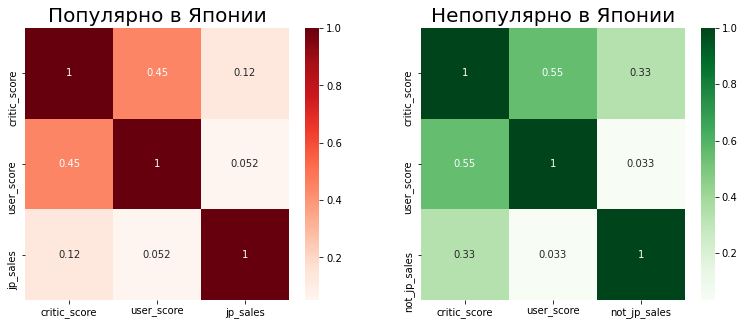

In [31]:
# Найдем игры, которые лучше всего продавались в Японии и в остальном мире
jp_df=actual_df.query('jp_sales > na_sales+eu_sales+other_sales')
not_jp_df = actual_df.query('jp_sales <= na_sales+eu_sales+other_sales')
# Сформируем датафреймы для тепловых карт
heatmap_df_jp=jp_df[['critic_score', 'user_score', 'jp_sales']]
heatmap_df_not_jp=not_jp_df[['critic_score', 'user_score', 'not_jp_sales']]
# Построим тепловые карты для Японии и остальноо мира
fig = plt.figure(figsize=(13,5))
fig.subplots_adjust(wspace=0.2)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.heatmap(heatmap_df_jp.corr(), ax=ax1, cmap='Reds', annot=True)
sns.heatmap(heatmap_df_not_jp.corr(), ax=ax2, cmap='Greens', annot=True)
ax1.set_title('Популярно в Японии', fontsize=20)
ax2.set_title('Непопулярно в Японии', fontsize=20)
plt.show()

Можно сказать что в целом зависимость продаж от отзывов пользователей практически отсутствует в обоих случаях, а вот связь между отзывами критиков и продажами различается, в Японии она значительно ниже.

### Вывод

**Портрет среднего пользователя из США**:
+ Играет на платформе X360, PS3 или PS4
+ Предпочитает жанры Action, Shooter, Sports и Role-Playing
+ Покупает игры с рейтингами M(17+), E(6+), E10(10+), T(13+)

**Портрет среднего пользователя из Европы**:
+ Играет на платформе PS3, PS4 или X360
+ Предпочитает жанры Action, Shooter, Sports и Role-Playing
+ Покупает игры с рейтингами M(17+), E(6+), T(13+), E10(10+)

**Портрет среднего пользователя из Японии**:
+ Играет на платформе 3DS или PS3, так же любит мобильные платформы
+ Предпочитает жанры Role-Playing и Action
+ Покупает игры без возрастного рейтинга ESRB

Отметим, что хотя в Японии объем рынка видеоигр значительно меньше, чем в США и Европе, спрогнозировать ближнесрочный спрос здесь проще, за счет ярко выраженых предпочтений.

# 5. Проверка гипотез

Проверим гипотезу о том, что средние пользовательские **рейтинги** платформ **Xbox One и PC** одинаковы.
+ **Нулевая гипотеза** состоит в том, что средние пользовательские рейтинги платформ Xbox One и PC **одинаковы**.
+ **Альтернативная гипотеза** состоит в том, средние пользовательские рейтинги платформ Xbox One и PC **отличаются**.


In [32]:
rating_xone = actual_df.query('platform == "XOne"')['user_score'].dropna() # Сформируем выборки рейтингов для разных платформ
rating_pc = actual_df.query('platform == "PC"')['user_score'].dropna() # Удалим пропуски

alpha = 0.05  # Критический уровень статистической значимости
results = st.ttest_ind(rating_xone, rating_pc) # equal_var оставляем по умолчанию True, т.к. выборки взяты из схожих по параметрам совокупностей
print('p-значение:', results.pvalue.round(4))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# Оценим среднее и медиану пользовательского рейтинга для PC и XOne
actual_df.query('platform =="XOne" or platform =="PC"').pivot_table(
    index='platform', values='user_score', aggfunc=['mean','median']).round(2)

p-значение: 0.6268
Не получилось отвергнуть нулевую гипотезу


,mean,median
,user_score,user_score
platform,,
PC,6.45,6.8
XOne,6.52,6.8


Даже если средние значения рейтингов не равны, с вероятностью более 62% такое, или большее различие можно получить случайно, соответственно у нас нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.

Проверим гипотезу о том, что средние пользовательские **рейтинги** жанров **Action и Sports** разные.
+ **Нулевая гипотеза** состоит в том, что что средние пользовательские рейтинги жанров Action и Sports **одинаковы**.
+ **Альтернативная гипотеза** состоит в том, средние пользовательские рейтинги жанров Action и Sports **отличаются**.


In [33]:
rating_action = actual_df.query('genre == "Action"')['user_score'].dropna() # Сформируем выборки рейтингов для разных платформ
rating_sports = actual_df.query('genre == "Sports"')['user_score'].dropna() # Удалим пропуски

alpha = 0.05  # Критический уровень статистической значимости
results = st.ttest_ind(rating_action, rating_sports) # equal_var оставляем по умолчанию True, т.к. выборки взяты из схожих по параметрам совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# Оценим среднее и медиану пользовательского рейтинга для Action и Sports
actual_df.query('genre == "Action" or genre == "Sports"').pivot_table(
    index='genre', values='user_score', aggfunc=['mean','median']).round(2)

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


,mean,median
,user_score,user_score
genre,,
Action,6.78,7.1
Sports,5.65,6.0


Отвергаем нулевую гипотезу, таким образом,  средние пользователские **рейтинги** для жанров Action и Sports **отличаются**. Можно предположить, что в среднем рейтинги Action выше.

# 6. Общий вывод
По итогам исследования были выявлены следующие закономерности, позволяющие прогнозировать коммерческий успех видеоигр на 2017 год:
1. Игровая платформа - важнейший критерий будущей популярности видеоигры. Средний срок жизни игровой платформы - **10 лет**, первую половину которых идет плавный рост продаж, а вторую - спад. Таким образом, для прогноза успешности игровой платформы целесообразно рассматривать **5 лет** предшествующие пронозу, в нашем исследовании этот отрезок времени назван актуальным периодом.


2. Для выбора перспективной игровой платформы недостаточно рассматривать только общий объем продаж за актуальный период, необходимо также рассмотерть продажи в динамике и выявить тенденцию с учетом среднего времени жизни игровой платформы.


3. Можно предположить, что в **2017** году наибольшим успехом будут пользоваться платформы **PS4 и XOne**. Если рассматривать отдельно японский рынок, целесообразно сделать ставку на платформу **3DS** - в Японии она вне конкуренции.

4. Для каждой платформы существует большое количество **игр-бестселлеров**, их продажи могут превышать средние значения в десятки раз. Для определения перспективных категорий игр целесообразно дополнительно к суммарным продажам оценивать **средние значения** продаж для интересующих категорий, это позволит выбрать оптимальные категории при ораниченном бюджете.

5. Для выбора потенциально успешной видеоигры необходимо изучить **оценки критиков** - есть прямая зависимость между этим параметром и объемом продаж. При этом **отзывы пользователей** коррелируют с продажами лишь на определенных платформах, таких как **WiiU, Wii, 3DS**. Для перспективных "западных" платформ, таких как PS4 и XOne, оценкой пользователей можно пренебречь, она никак не связана с объемом продаж. Также отметим, что для японского рынка связь между отзывами критиков и продажами гораздо ниже, чем в остальном мире.


6. Самые продаваемые игровые жанры - **Action, Shooter, Role-Playing и Sports** в абсолютных значениях и **Shooter, Platform и Sports** если рассматривать средние продажи. Однако если рассматривать отдельно японский рынок, в первую очередь необходимо обратить внимание на **Role-Playing и Action** - эти жанры покрывают почти 60% всех продаж в Японии.


7. Возрастные рейтинги самых популярных игр - **M(17+), E(6+), E10(10+) и T(13+)**. На японском рынке, бóльшая часть всех игр (56%) продается **без указания** возрастного рейтинга ESRB.


8. Параметры потенциально успешной видеоигры могут кардинально различаться в зависимости от **региона**, это обязательно нужно учитывать при составлении прогноза. Как уже стало понятно из предыдущих пунктов, рынок видеоигр Японии практически ни в чем не похож на рынок США и Европы, здесь своя популярная платформа, свои любимые жанры, свой возрастной рейтинг - Computer Entertainment Rating Organization (CERO), и даже отличаются некоторые закономерности, например связь между отзывами критиков и продажами гораздо слабее, чем в остальном мире. Отметим, что хотя рынок видеоигр в Японии гораздо меньше, чем в США или Европе, спрогнозировать ближнесрочный спрос здесь проще, за счет ярко выраженых предпочтений, однако для этого целесообразно собрать дополнительную информацию, например данные японского возрастного рейтинга CERO и отзывы местных критиков.